In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-set4/data_set_train_facenet/val/Aditya_Tiwari/Aditya_Tivari_Test.jpeg
/kaggle/input/data-set4/data_set_train_facenet/val/Arnav_Gautam/Arnav.jpeg
/kaggle/input/data-set4/data_set_train_facenet/val/Abhishek_Kumar/Abhishek3.jpg
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at1.png
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at2.png
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at5.png
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at3.png
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at4.png
/kaggle/input/data-set4/data_set_train_facenet/train/Aditya_Tiwari/at6.png
/kaggle/input/data-set4/data_set_train_facenet/train/Arnav_Gautam/Arnav3.png
/kaggle/input/data-set4/data_set_train_facenet/train/Arnav_Gautam/Arnav5.png
/kaggle/input/data-set4/data_set_train_facenet/train/Arnav_Gautam/Arnav6.png
/kaggle/input/data-set4/data_set_train_facenet/train/Arnav_Gautam/Arnav1.pn

In [2]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.5 MB/s eta 0:00:00a 0:00:01


In [3]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


MTCNN or Multi-Task Cascaded Convolutional Neural Networks is a neural network which detects faces and facial landmarks on images.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data-set4', 'facenet-keras']


data sets used:

data-set4 (personal data set for images) \
facenet-keras (dataset used for importing facenet)

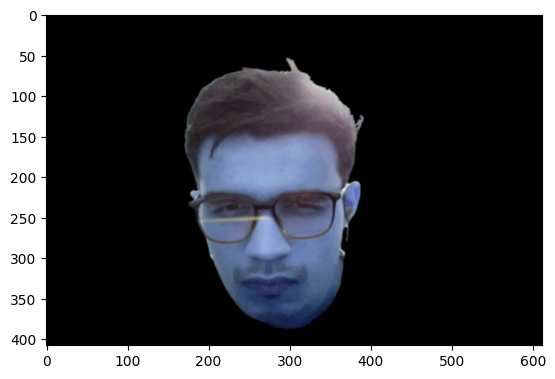

(408, 612, 3)


In [5]:
try:
    img = cv2.imread('../input/data-set4/data_set_train_facenet/train/Abhishek_Kumar/abhishek3.png')
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.show()
    print(img.shape)
except Exception as e:
    print(f"An error occurred: {str(e)}")

1/1 [==============================] - 0s 160ms/step


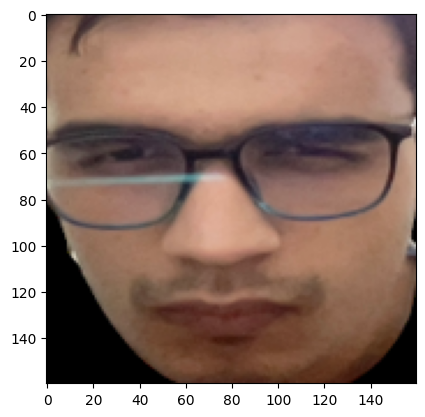

(160, 160, 3)


In [6]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('../input/data-set4/data_set_train_facenet/train/Abhishek_Kumar/abhishek3.png')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

### extracting Input imagse in form of matrices

In [7]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('../input/data-set4/data_set_train_facenet/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('../input/data-set4/data_set_train_facenet/val/')
print(testX.shape, testy.shape)

np.savez_compressed('dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 153ms/step
loaded 6 sample for class: Aditya_Tiwari
1/1 [==============================] - 0s 156ms/step
loaded 6 sample for class: Arnav_Gautam
1/1 [==============================] - 0s 175ms/step
loaded 6 sample for class: J_V_Aditya
1/1 [==============================] - 0s 161ms/step
loaded 6 sample for class: Lalit_gaur
1/1 [==============================] - 0s 155ms/step
loaded 6 sample for class: Karan_Khumbar
1/1 [==============================] - 0s 154ms/step
loaded 6 sample for class: Dhruv_Saini
1/1 [==============================] - 0s 157ms/step
loaded 6 sample for class: Vinayak_Kesarwani
1/1 [==============================] - 0s 147ms/step
loaded 7 sample for class: Abhishek_Kumar
1/1 [==============================] - 0s 169ms/step
loaded 6 sample for class: Chirovolu_Nikhil
1/1 [==============================] - 0s 155ms/step
loaded 6 sample for class: Omm_Prakash_Sahoo
1/1 [==============================] - 0s 156ms/step
load

In [8]:
data = np.load('dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (86, 160, 160, 3) (86,) (3, 160, 160, 3) (3,)


In [9]:
!pip install tensorflow

Tensflow helps you implement best practices for data automation, model tracking, performance monitoring, and model retraining

In [10]:
!pip install keras-facenet

from keras_facenet import FaceNet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=6ba47db69835587a5313a875ddfe0be7d6f4397c4bffa2365adc9b808c04f17e
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [11]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
     

In [12]:
import keras
print(keras.__version__)

2.12.0


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Importing facenet and putting it into variable names facenet_model

In [14]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False

# Add custom layers for face recognition
facenet_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128),
    layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
])

219055592/219055592 [==============================] - 9s 0us/step


In [15]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 126ms/step
(86, 128)
1/1 [==============================] - 0s 121ms/step
(3, 128)


Measuring accuracy of the model

In [16]:
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Normalizer
# from sklearn.svm import SVC

# print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# # normalize input vectors
# in_encoder = Normalizer()
# emdTrainX_norm = in_encoder.transform(emdTrainX)
# emdTestX_norm = in_encoder.transform(emdTestX)
# # label encode targets
# out_encoder = LabelEncoder()
# out_encoder.fit(trainy)
# trainy_enc = out_encoder.transform(trainy)
# testy_enc = out_encoder.transform(testy)
# # fit model
# model = SVC(kernel='poly',degree=10 ,probability=True)
# model.fit(emdTrainX_norm, trainy_enc)
# # predict
# yhat_train = model.predict(emdTrainX_norm)
# yhat_test = model.predict(emdTestX_norm)
# # score
# score_train = accuracy_score(trainy_enc, yhat_train)
# score_test = accuracy_score(testy_enc, yhat_test)
# # summarize
# print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='rbf', C=4.0, probability=True)  # Adjust kernel and C value
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))
test_accuracy = score_test*100

Dataset: train=86, test=3
Accuracy: train=96.512, test=66.667


getting output for test images

Predicted: 
['Abhishek_Kumar' 'Aditya_Dubey' 'Aditya_Singh' 'Aditya_Tiwari'
 'Arnav_Gautam' 'Chirovolu_Nikhil' 'Dhruv_Saini' 'J_V_Aditya'
 'Karan_Khumbar' 'Kunal_Singla' 'Lalit_gaur' 'Omm_Prakash_Sahoo'
 'Satyam_Sangwan' 'Vinayak_Kesarwani'] 
[ 4.89841901  4.1806759  10.69897752 29.58497143  9.00616551  5.90544765
  7.50485651  2.85467046  4.85955381  6.1941683   3.73098316  3.02076438
  2.97640747  4.58393889]
Expected: Aditya_Tiwari


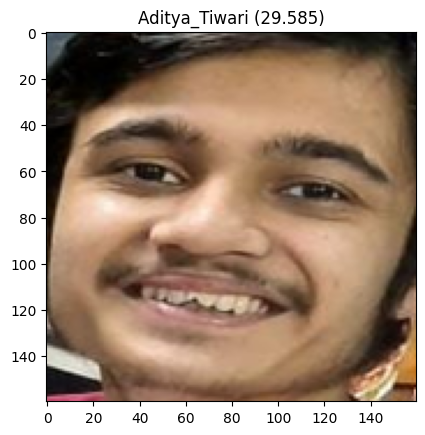

Predicted: 
['Abhishek_Kumar' 'Aditya_Dubey' 'Aditya_Singh' 'Aditya_Tiwari'
 'Arnav_Gautam' 'Chirovolu_Nikhil' 'Dhruv_Saini' 'J_V_Aditya'
 'Karan_Khumbar' 'Kunal_Singla' 'Lalit_gaur' 'Omm_Prakash_Sahoo'
 'Satyam_Sangwan' 'Vinayak_Kesarwani'] 
[ 4.12961698 30.26969383  2.57100869  7.4925902   3.7026707   1.06357654
  6.82098643  1.82419462  3.29479553  5.77667481  2.10344876  5.78503631
 21.879099    3.2866076 ]
Expected: Arnav_Gautam


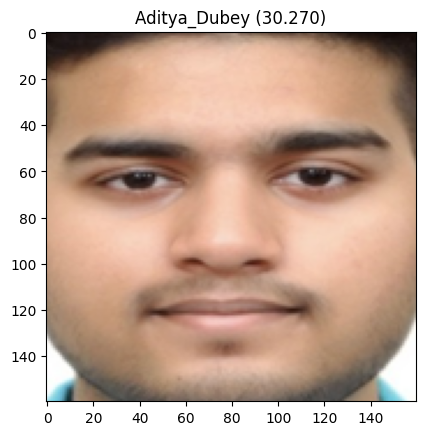

Predicted: 
['Abhishek_Kumar' 'Aditya_Dubey' 'Aditya_Singh' 'Aditya_Tiwari'
 'Arnav_Gautam' 'Chirovolu_Nikhil' 'Dhruv_Saini' 'J_V_Aditya'
 'Karan_Khumbar' 'Kunal_Singla' 'Lalit_gaur' 'Omm_Prakash_Sahoo'
 'Satyam_Sangwan' 'Vinayak_Kesarwani'] 
[21.11258802  7.09620022  5.3285347   9.78879223  9.54534734  3.66348923
  5.39711563  7.06449271  5.25108065  6.46798395  3.34530387  4.34186311
  3.60930114  7.9879072 ]
Expected: Abhishek_Kumar


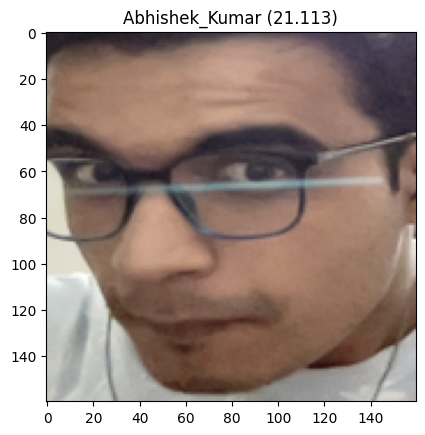

In [22]:
from random import choice
# select a random face from test set
for i in range (testX.shape[0]):
#     selection = choice([i for i in range(testX.shape[0])])
    random_face = testX[i]
    random_face_emd = emdTestX_norm[i]
    random_face_class = testy_enc[i]
    random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
    samples = np.expand_dims(random_face_emd, axis=0)
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    all_names = out_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    #print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
    print('Expected: %s' % random_face_name[0])
    # plot face
    plt.imshow(random_face)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    plt.title(title)
    plt.show()

In [ ]:
test_accuracy

In [ ]:
print(yhat_prob[0]*100)

In [ ]:
print(all_names[3])